In [2]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv('insurance2.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

In [6]:
seed(47)
random = norm.rvs(size=5)

In [7]:
print (random)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


In [8]:
print (np.mean(random))

0.19355593334131074


In [9]:
print(np.std(random))

0.9606195639478641


In [10]:
print(np.std(random, ddof = 1))

1.0740053227518152


In [11]:
help(np.std)

Help on function std in module numpy:

std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)
    Compute the standard deviation along the specified axis.
    
    Returns the standard deviation, a measure of the spread of a distribution,
    of the array elements. The standard deviation is computed for the
    flattened array by default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Calculate the standard deviation of these values.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the standard deviation is computed. The
        default is to compute the standard deviation of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a standard deviation is performed over
        multiple axes, instead of a single axis or all the axes as before.
    dtype : dtype, optional
        Type to use in computing the standard deviation. 

In [12]:
seed(47)
pop_heights = norm.rvs(172, 5, size = 50000)

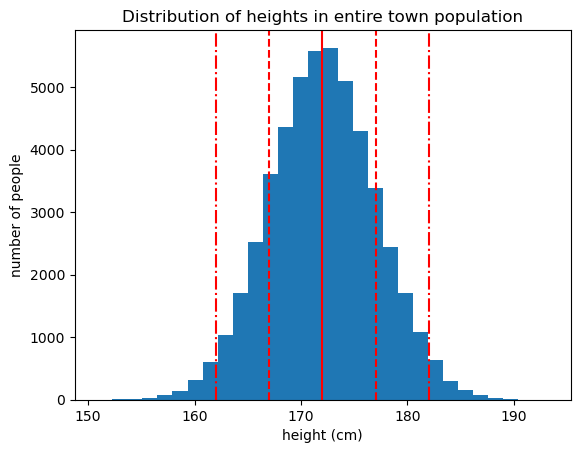

In [13]:
_ = plt.hist(pop_heights, bins = 30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color = 'r')
_ = plt.axvline(172+5, color = 'r', linestyle = '--')
_ = plt.axvline(172-5, color = 'r', linestyle = '--')
_ = plt.axvline(172+10, color = 'r', linestyle = '-.')
_ = plt.axvline(172-10, color = 'r', linestyle = '-.')
plt.show()

In [14]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

In [15]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

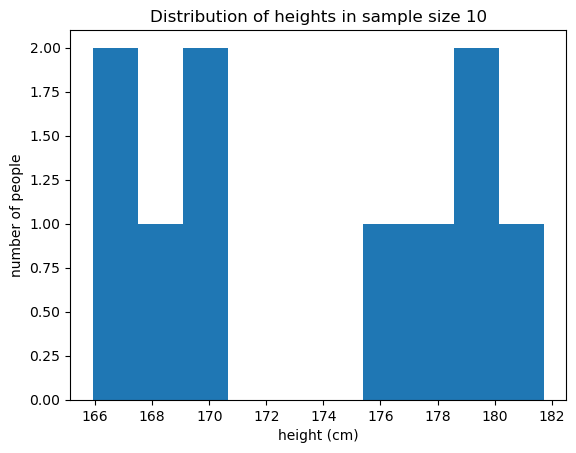

In [16]:
_ = plt.hist(daily_sample1, bins = 10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')
plt.show()

In [17]:
print (np.mean(daily_sample1))

173.47911444163503


In [18]:
daily_sample2 = townsfolk_sampler(10)

In [19]:
print (np.mean(daily_sample2))

173.7317666636263


In [20]:
daily_mean = []

In [21]:
seed(47)
for _ in range(365):
    sample = townsfolk_sampler(10)
    daily_mean.append(np.mean(sample))

In [22]:
daily_mean[:5]

[173.47911444163503,
 173.7317666636263,
 172.54893867276104,
 171.43257319553967,
 172.7151613148319]

In [23]:
np.mean(daily_mean)

171.8660049358649

In [24]:
np.std(daily_mean)

1.5756704135286475

In [26]:
daily_mean2 = []

In [27]:
seed(47)
for _ in range(365):
    sample = townsfolk_sampler(50)
    daily_mean2.append(np.mean(sample))

In [28]:
daily_mean2[:5]

[172.7815108576788,
 172.79757492503552,
 172.9396310954854,
 173.3542075784445,
 171.1485580390421]

In [29]:
np.mean(daily_mean2)

171.94366080916114

In [30]:
np.std(daily_mean2)

0.6736107539771146

In [32]:
norm.cdf(1)

0.8413447460685429

In [34]:
norm.cdf(177, loc = 172, scale = 5)

0.8413447460685429

In [38]:
norm.pdf(200, loc = 172, scale = 5)
#We should be surprised by this value based on this p-value, with it being significantly small, 
#meaning the probability of getting a value at least this extreme is very small, but this equation is not a 
#great measure of actual probability

1.2365241000331715e-08

In [40]:
seed(47)
sample_50 = townsfolk_sampler(50)

In [42]:
sample_mean = np.mean(sample_50)
print(sample_mean)

172.7815108576788


In [45]:
sample_std = np.std(sample_50, ddof=1)
print(sample_std)

4.195424364433547


In [49]:
z_critical = norm.ppf(0.975)
sample_margin_error = z_critical * (sample_std/np.sqrt(50))
print (sample_margin_error)

1.1628909342876539


In [51]:
sample_ci = (sample_mean - sample_margin_error, sample_mean + sample_margin_error)

In [53]:
print(sample_ci)

(171.61861992339115, 173.94440179196644)


In [54]:
#We are missing the population standard deviation
#When we use z value we assume we know the pupulation standard deviation

In [56]:
t_critical = t.ppf(0.975, 49)

In [58]:
sample_t_margin = t_critical * (sample_std/np.sqrt(50))
#sample margin of error ussing t distribution

In [60]:
sample_t_ci = (sample_mean - sample_t_margin, sample_mean + sample_t_margin)
print(sample_t_ci)
#It is slightly wider than that of the normal z_critical distribution
#Reflecting the greater uncertainty given that we are estimating population
#parameters from a sample

(171.589184447403, 173.9738372679546)


In [61]:
# Frequentist Inference: Part B.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [66]:
medical.shape

(1338, 8)

In [68]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


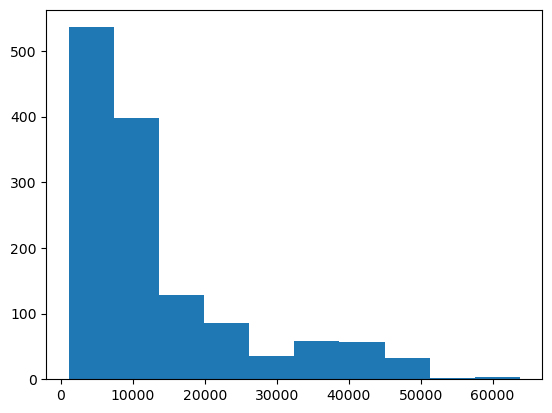

In [70]:
_ = plt.hist(medical['charges'])
plt.show()

In [74]:
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'])
print (mean_charges, std_charges)

13270.422265141257 12105.484975561605


In [78]:
n = medical['charges'].count()
t_critical = t.ppf(0.95, n-1)
print(t_critical)

1.6459941145571317


In [79]:
#Since we do not know the population std, we will use the t distribution

In [81]:
margin_error = t_critical * (std_charges/np.sqrt(n))
print(margin_error)

544.7314053390934


In [83]:
ci = (mean_charges - margin_error, mean_charges + margin_error)
print(ci)

(12725.690859802164, 13815.15367048035)


In [84]:
#With the t distribution calculation we believe that
#The true mean is not below 12,000

In [100]:
#Administrator wants to know whether people with insurance 
#really are charged a different amount to those without 

In [ ]:
#Null hypothesis: they are not charged a different amount based on claim
#Alternative: they are not charged the same.

In [90]:
count = medical.groupby('insuranceclaim')['charges'].count()
std_by_insurance = medical.groupby('insuranceclaim')['charges'].std()
print(count)
print(std_by_insurance)

insuranceclaim
0    555
1    783
Name: charges, dtype: int64
insuranceclaim
0     6446.510127
1    14045.928419
Name: charges, dtype: float64


In [92]:
n_0 = count[0]
n_1 = count[1]
s_0 = std_by_insurance[0]
s_1 = std_by_insurance[1]

In [95]:
s_p = np.sqrt(((n_0 -1)*s_0**2 + (n_1 -1)*s_1**2)/(n_0 + n_1 - 2))

In [99]:
mean_by_insurance = medical.groupby('insuranceclaim')['charges'].mean()
x_0 = mean_by_insurance[0]
x_1 = mean_by_insurance[1]
t = (x_0 - x_1)/(s_p * np.sqrt((1/n_0) + (1/n_1)))
print(t)

-11.893299030876715


In [110]:
t, p = stats.ttest_ind_from_stats(x_0, s_0, n_0, x_1, s_1, n_1)
print('t-value:', t, 'p_value:', p)

t-value: -11.893299030876719 p_value: 4.4612302316203985e-31


In [ ]:
#Reject the null hypothesis because the p-value is very small
#4.46e-31